PROBLEM STATEMENT :
Thyroid disease is a common cause of medical diagnosis and prediction, with an onset
that is difficult to forecast in medical research. The thyroid gland is one of our body's
most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid
that releases thyroid hormones in regulating the rate of body's metabolism.
The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid
disease or not.


	Class 1: (normal)	150
	Class 2: (hyper)	35
	Class 3: (hypo)		30


#### IMPORTING DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.svm import SVC


In [3]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data",
               names=
               ["Class attribute","T3 resin uptake test",
                     "Total Serum thyroxin",
                    "Total serum triiodothyronine",
                      "basal thyroid-stimulating hormone (TSH)",
                     "Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

In [4]:
data

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
210,3,118,6.5,1.3,1.7,11.5
211,3,139,4.2,0.7,4.3,6.3
212,3,103,5.1,1.4,1.2,5.0
213,3,97,4.7,1.1,2.1,12.6


#### DATA EXPLORATION

In [5]:
# Detailed ablout data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Class attribute                                                                                                                             215 non-null    int64  
 1   T3 resin uptake test                                                                                                                        215 non-null    int64  
 2   Total Serum thyroxin                                                                                                                        215 non-null    float64
 3   Total serum triiodothyronine                  

In [6]:
# check for null values
data.isna().sum()

Class attribute                                                                                                                               0
T3 resin uptake test                                                                                                                          0
Total Serum thyroxin                                                                                                                          0
Total serum triiodothyronine                                                                                                                  0
basal thyroid-stimulating hormone (TSH)                                                                                                       0
Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.441860,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.726737,13.145447,4.697362,1.419486,6.118031,8.070519
min,1.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,1.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,2.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,3.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [9]:
data.dtypes

Class attribute                                                                                                                                 int64
T3 resin uptake test                                                                                                                            int64
Total Serum thyroxin                                                                                                                          float64
Total serum triiodothyronine                                                                                                                  float64
basal thyroid-stimulating hormone (TSH)                                                                                                       float64
Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value    float64
dtype: object

In [10]:
data.shape

(215, 6)

#### DATA  EDA

<AxesSubplot:xlabel='Class attribute', ylabel='count'>

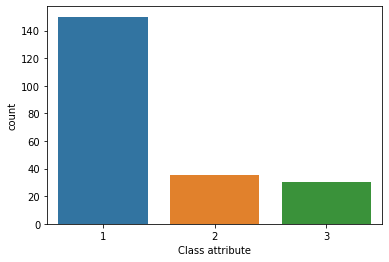

In [11]:
sns.countplot(x="Class attribute",data=data)

#### DATA CLEANING

### Removing Outlier 

In [20]:
data["T3 resin uptake test"].describe()

count    215.000000
mean     109.876744
std       12.152912
min       81.250000
25%      103.000000
50%      110.000000
75%      117.500000
max      139.250000
Name: T3 resin uptake test, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x227418e8970>,
 'caps': [<matplotlib.lines.Line2D at 0x227418f5070>,
 'boxes': [<matplotlib.lines.Line2D at 0x227418e8610>],
 'medians': [<matplotlib.lines.Line2D at 0x227418f5730>],
 'fliers': [<matplotlib.lines.Line2D at 0x227418f5a90>],
 'means': []}

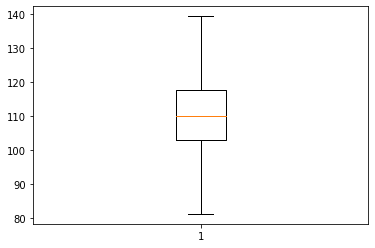

In [21]:
# Before Removing outlier
plt.boxplot(data["T3 resin uptake test"])

In [22]:
def outlierremove(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [23]:
lower_1,upper_1=outlierremove(data["T3 resin uptake test"])
lower_1,upper_1


(81.25, 139.25)

In [24]:
data['T3 resin uptake test']=np.where(data['T3 resin uptake test']>upper_1,upper_1,data['T3 resin uptake test'])

In [25]:
data['T3 resin uptake test']=np.where(data['T3 resin uptake test']<lower_1,lower_1,data['T3 resin uptake test'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227417ed820>,
 'caps': [<matplotlib.lines.Line2D at 0x22741907ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x227417b4610>],
 'medians': [<matplotlib.lines.Line2D at 0x22741924a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x227418aea30>],
 'means': []}

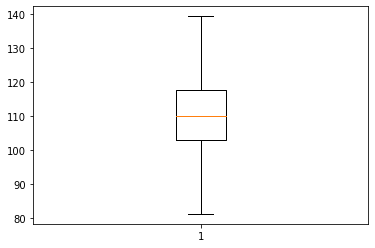

In [26]:
# After Removing Outlier
plt.boxplot(data["T3 resin uptake test"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22741994490>,
 'caps': [<matplotlib.lines.Line2D at 0x22741994b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22741994100>],
 'medians': [<matplotlib.lines.Line2D at 0x2274199d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2274199d5b0>],
 'means': []}

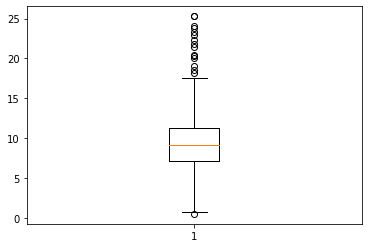

In [27]:
## Before Removing outlier
plt.boxplot(data["Total Serum thyroxin"])

In [28]:
lower_2,upper_2=outlierremove(data["Total Serum thyroxin"])
lower_2,upper_2


(0.799999999999998, 17.6)

In [29]:
data['Total Serum thyroxin']=np.where(data['Total Serum thyroxin']>upper_2,upper_2,data['Total Serum thyroxin'])

In [30]:
data['Total Serum thyroxin']=np.where(data['Total Serum thyroxin']<lower_2,lower_2,data['Total Serum thyroxin'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227419ed8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x227419edf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x227419ed550>],
 'medians': [<matplotlib.lines.Line2D at 0x227419f7670>],
 'fliers': [<matplotlib.lines.Line2D at 0x227419f79d0>],
 'means': []}

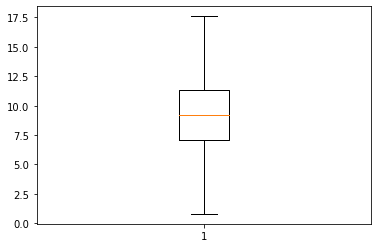

In [31]:
## After Removing outlier
plt.boxplot(data["Total Serum thyroxin"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22741aa5c40>,
 'caps': [<matplotlib.lines.Line2D at 0x22741ab2340>,
 'boxes': [<matplotlib.lines.Line2D at 0x22741aa58e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22741ab2a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22741ab2d60>],
 'means': []}

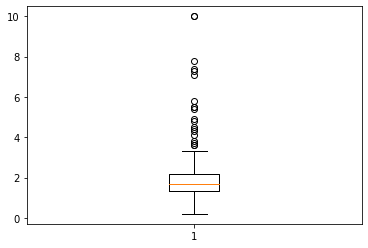

In [33]:
# Before Removing outlier
plt.boxplot(data["Total serum triiodothyronine"])

In [34]:
lower_1,upper_1=outlierremove(data["Total serum triiodothyronine"])
lower_1,upper_1


(0.07499999999999996, 3.4750000000000005)

In [35]:
data['Total serum triiodothyronine']=np.where(data['Total serum triiodothyronine']>upper_1,upper_1,data['Total serum triiodothyronine'])

In [36]:
data['T3Total serum triiodothyronine']=np.where(data['Total serum triiodothyronine']<lower_1,lower_1,data['Total serum triiodothyronine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22741b0c160>,
 'caps': [<matplotlib.lines.Line2D at 0x22741b0c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x22741affdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x22741b0cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22741b18280>],
 'means': []}

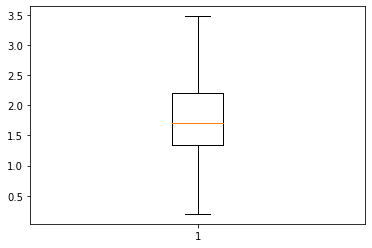

In [37]:
#After Removing outlier
plt.boxplot(data["Total serum triiodothyronine"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22741bca040>,
 'caps': [<matplotlib.lines.Line2D at 0x22741bca700>,
 'boxes': [<matplotlib.lines.Line2D at 0x22741bbbca0>],
 'medians': [<matplotlib.lines.Line2D at 0x22741bcadc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22741bd7160>],
 'means': []}

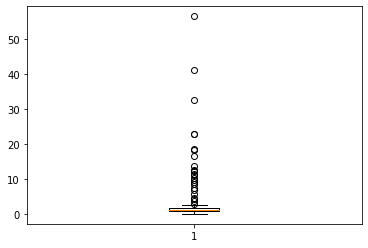

In [39]:
# Before Removing outlier
plt.boxplot(data["basal thyroid-stimulating hormone (TSH)"])

In [40]:
lower_1,upper_1=outlierremove(data["basal thyroid-stimulating hormone (TSH)"])
lower_1,upper_1


(-0.04999999999999982, 2.75)

In [41]:
data['basal thyroid-stimulating hormone (TSH)']=np.where(data['basal thyroid-stimulating hormone (TSH)']>upper_1,upper_1,data['basal thyroid-stimulating hormone (TSH)'])

In [42]:
data['basal thyroid-stimulating hormone (TSH)']=np.where(data['basal thyroid-stimulating hormone (TSH)']<lower_1,lower_1,data['basal thyroid-stimulating hormone (TSH)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22742bf4430>,
 'caps': [<matplotlib.lines.Line2D at 0x22742bf4af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22742bf40d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22742bff1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22742bff550>],
 'means': []}

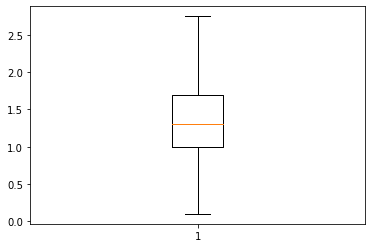

In [43]:
# Before Removing outlier
plt.boxplot(data["basal thyroid-stimulating hormone (TSH)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22742c4d880>,
 'caps': [<matplotlib.lines.Line2D at 0x22742c4df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22742c4d520>],
 'medians': [<matplotlib.lines.Line2D at 0x22742c5b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x22742c5b9d0>],
 'means': []}

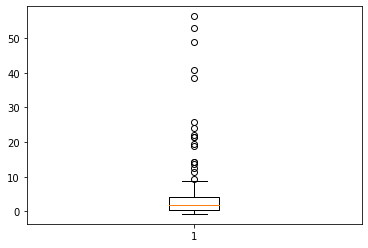

In [44]:
plt.boxplot(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

In [45]:
lower_1,upper_1=outlierremove(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])
lower_1,upper_1


(-4.7749999999999995, 9.424999999999999)

In [46]:
data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']=np.where(data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']>upper_1,upper_1,data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value'])

In [47]:
data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']=np.where(data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']<lower_1,lower_1,data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22742ca5ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x22742cb23a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22742ca5940>],
 'medians': [<matplotlib.lines.Line2D at 0x22742cb2a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22742cb2dc0>],
 'means': []}

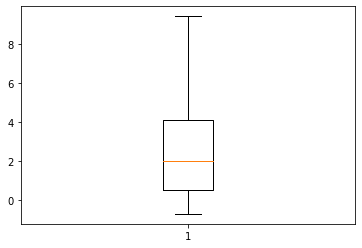

In [48]:
#After Removing outlier
plt.boxplot(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

<AxesSubplot:xlabel='Class attribute', ylabel='count'>

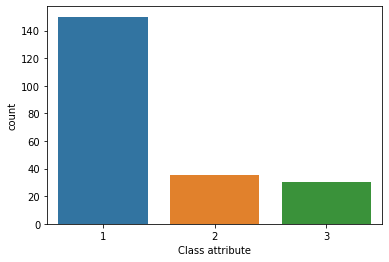

In [49]:
sns.countplot(x="Class attribute",data=data)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

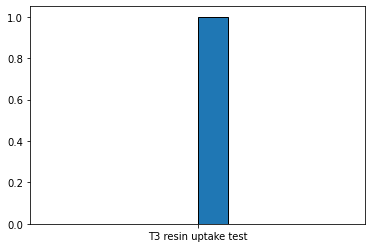

In [50]:
plt.hist("T3 resin uptake test",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3 resin uptake test', ylabel='Density'>

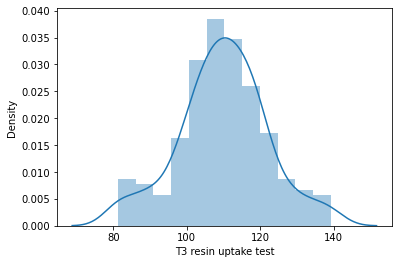

In [51]:
sns.distplot(data["T3 resin uptake test"])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

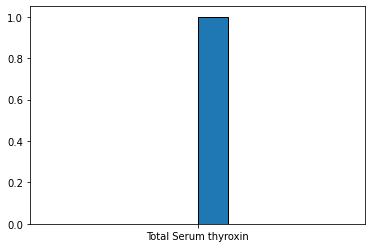

In [52]:
plt.hist("Total Serum thyroxin",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Serum thyroxin', ylabel='Density'>

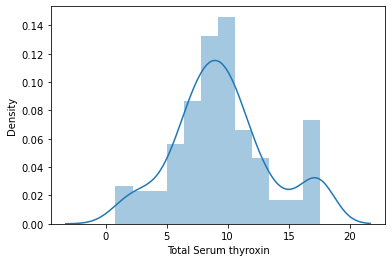

In [53]:
sns.distplot(data["Total Serum thyroxin"])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

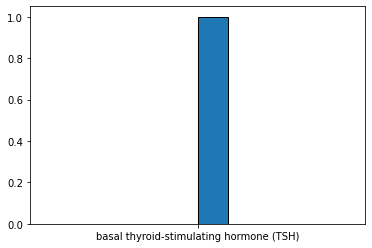

In [54]:
plt.hist("basal thyroid-stimulating hormone (TSH)",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='basal thyroid-stimulating hormone (TSH)', ylabel='Density'>

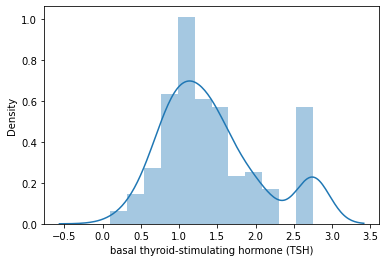

In [55]:
sns.distplot(data["basal thyroid-stimulating hormone (TSH)"])

In [57]:
# check forr corrolation
data.corr()

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value,T3Total serum triiodothyronine
Class attribute,1.000000,0.135293,-0.208926,-0.053148,0.488220,0.447638,-0.053148
T3 resin uptake test,0.135293,1.000000,-0.439689,-0.367620,0.369289,0.460844,-0.367620
Total Serum thyroxin,-0.208926,-0.439689,1.000000,0.716709,-0.525534,-0.646526,0.716709
Total serum triiodothyronine,-0.053148,-0.367620,0.716709,1.000000,-0.413113,-0.454709,1.000000
basal thyroid-stimulating hormone (TSH),0.488220,0.369289,-0.525534,-0.413113,1.000000,0.600001,-0.413113
Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value,0.447638,0.460844,-0.646526,-0.454709,0.600001,1.000000,-0.454709
T3Total serum triiodothyronine,-0.053148,-0.367620,0.716709,1.000000,-0.413113,-0.454709,1.000000


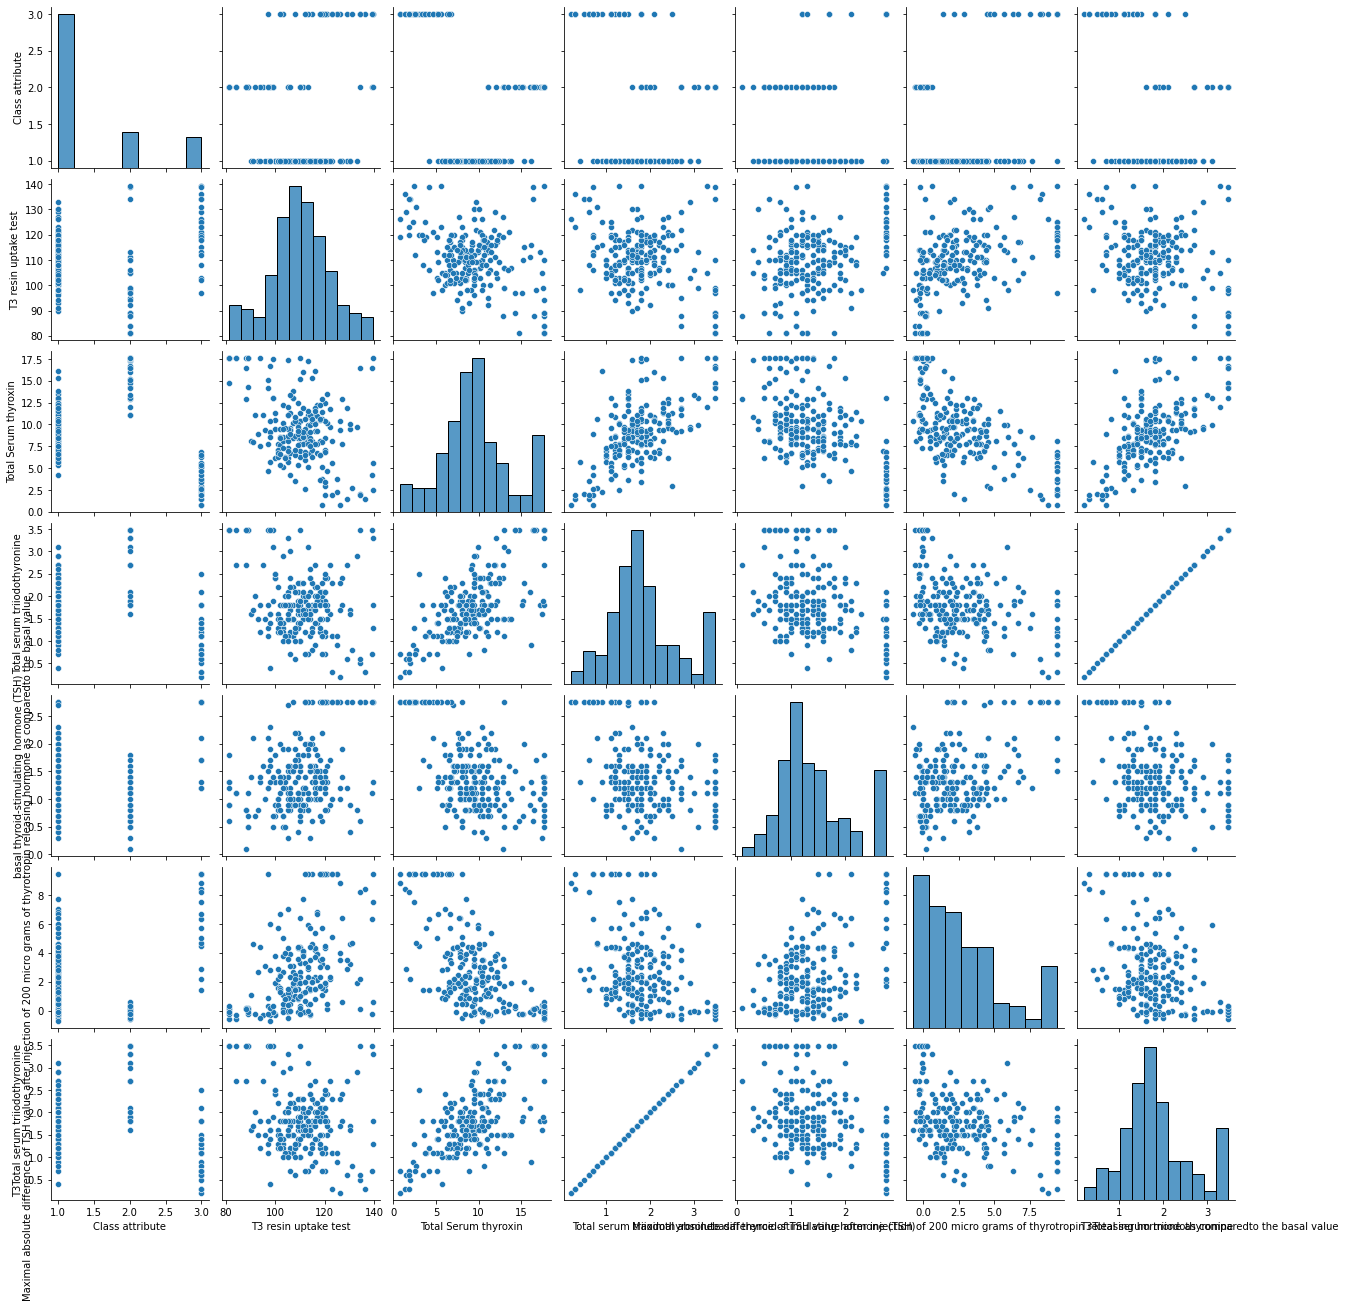

In [62]:
#pairplot 
sns.pairplot(data)

In [63]:
d1=data.apply(LabelEncoder().fit_transform)

In [64]:
d1 = d1.drop(d1.columns[6],axis=1)

In [65]:
d1.head()

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,0,21,52,20,7,32
1,0,27,50,28,18,56
2,0,40,67,22,12,12
3,0,23,19,14,12,21
4,0,19,31,13,13,5


#### Standardizing The data

In [66]:
def norm_func(i):
    x=(i-i.mean())/(i.min()-i.max())
    return x

In [67]:
d1.iloc[:,1:]

,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,21,52,20,7,32
1,27,50,28,18,56
2,40,67,22,12,12
3,23,19,14,12,21
4,19,31,13,13,5
...,...,...,...,...,...
210,32,25,11,15,68
211,47,16,5,23,58
212,17,18,12,10,52
213,11,17,9,19,68


In [68]:
data1=norm_func(d1.iloc[:,1:])
data1=data1.values
data1

array([[ 0.05784884, -0.07609519, -0.12806202,  0.21354904, -0.03105335],
       [-0.06715116, -0.05283937, -0.39472868, -0.26471183, -0.38399453],
       [-0.3379845 , -0.25051379, -0.19472868, -0.00384226,  0.2630643 ],
       ...,
       [ 0.14118217,  0.31925365,  0.13860465,  0.08311426, -0.325171  ],
       [ 0.26618217,  0.33088156,  0.23860465, -0.30819009, -0.56046512],
       [ 0.1620155 ,  0.30762574,  0.13860465,  0.039636  , -0.44281806]])

### MODEL BUILDING AND MODEL EVALUTION using Differeent Models

In [69]:
from sklearn.model_selection import train_test_split
Y=d1.iloc[:,0]
X=data1

In [70]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
210    2
211    2
212    2
213    2
214    2
Name: Class attribute, Length: 215, dtype: int64

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.23)

In [72]:
print("X_train_shape",X_train.shape,
     "X_test_shape",X_test.shape,
     "Y_train_shape",Y_train.shape,
     "Y_test_shape",Y_test.shape)

X_train_shape (165, 5) X_test_shape (50, 5) Y_train_shape (165,) Y_test_shape (50,)


### 1. Model  -  Logistic  Regression

In [103]:
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)
y_pred=model_log.predict(X_test)
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        35
           1       1.00      0.38      0.55         8
           2       1.00      0.71      0.83         7

    accuracy                           0.86        50
   macro avg       0.94      0.70      0.76        50
weighted avg       0.88      0.86      0.84        50



### 2. Model - Decision  Tree  Classifier

In [90]:
model_dt=DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=100,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
    )
model_dt.fit(X_train,Y_train)
y_pred=model_dt.predict(X_test)
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.62      0.77         8
           2       1.00      0.86      0.92         7

    accuracy                           0.92        50
   macro avg       0.97      0.83      0.88        50
weighted avg       0.93      0.92      0.91        50



### 3. Model -  SVM 

In [93]:
model_svm=SVC(
    C=13,
    kernel='rbf',
    degree=3,
    gamma=0.5,)
model_svm.fit(X_train,Y_train)


SVC(C=13, gamma=0.5)

#### GridSearchCV for Prameter Tunning

In [76]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[75,85,90,95,80,70,10,0.5],
               'C':[25,30,40,50,20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 30, 40, 50, 20, 15, 14, 13, 12, 11, 10, 0.1,
                                0.001],
                          'gamma': [75, 85, 90, 95, 80, 70, 10, 0.5],
                          'kernel': ['rbf']}])

In [77]:
gsv.best_params_ , gsv.best_score_

({'C': 40, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9761029411764707)

In [94]:
y_pred=model_svm.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.75      0.86         8
           2       1.00      0.86      0.92         7

    accuracy                           0.94        50
   macro avg       0.97      0.87      0.91        50
weighted avg       0.94      0.94      0.94        50



### 4. Model - KNN 

In [95]:
model_knn=KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)
model_knn.fit(X_train,Y_train)
model_knn_score=model_knn.score(X_test,Y_test)
model_knn_score


0.9

In [96]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [97]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [98]:
print(grid.best_score_)
print(grid.best_params_)

0.9534883720930232
{'n_neighbors': 3}


In [99]:
y_pred=model_knn.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.50      0.67         8
           2       1.00      0.86      0.92         7

    accuracy                           0.90        50
   macro avg       0.96      0.79      0.84        50
weighted avg       0.91      0.90      0.89        50



### 5. Model - Bagging Classifier

In [82]:
kfold = KFold(n_splits=10,)
cart = DecisionTreeClassifier()
num_trees = 100
model_bagg= BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=100)
results =cross_val_score(model_bagg, X, Y, cv=kfold)
model_bagg_score=(results.mean()*100)
model_bagg_score

93.8961038961039

###  6. Model - Random Forest Classifier

In [83]:
num_trees = 90
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model_rf= RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=100)
results = cross_val_score(model_rf, X, Y, cv=kfold)
model_rf_score=(results.mean()*100)
model_rf_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


95.30303030303031

### 7. Model - Adaboost classifier

In [84]:
num_trees = 10
kfold = KFold(n_splits=10, random_state=100)
model_ada= AdaBoostClassifier(n_estimators=num_trees,random_state=100)
results = cross_val_score(model_ada, X, Y, cv=kfold)
model_ada_score=(results.mean()*100)
model_ada_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


70.06493506493506

### 8. Model -  Voting Classifier

In [85]:
kfold = KFold(n_splits=10, random_state=100)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
model_vot_score=(results.mean()*100)
model_vot_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


92.87878787878788

In [110]:
pickle.dump(model_log,open('model_log.pkl','wb'))

pickle.dump(model_dt,open('model_dt.pkl','wb'))

pickle.dump(model_svm,open('model_svm.pkl','wb'))

pickle.dump(model_knn,open('model_knn.pkl','wb'))

pickle.dump(model_bagg,open('model_bagg.pkl','wb'))

pickle.dump(model_rf,open('model_rf.pkl','wb'))

